# **Exploring User Engagement Pattern on Social Media: An Analysis of Country, Age, User Duration and Likes-Omole Gbeminiyi**

**Objective:**
The objective of this project is to analyze user engagement on social
media platforms by examining the relationship between users'
countries, age groups, duration of activity, and the number of likes
received. The goal is to identify patterns in user duration and likes
across different countries and age groups, understand how age and
geographical influence user activity, and derive insights that can help tailor content strategies to maximize user engagement

This data was gotten from kaggle.com

# Importing Packages

In [1]:
#importing essential libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#uploading dataset
from google.colab import files
df=files.upload()

Saving social-media.csv to social-media.csv


# Loading and Exploring the Data

In [3]:
#reading the data set
df=pd.read_csv('social-media.csv')

In [4]:
#displaying the top 5 rows
df.head(5)

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


In [5]:
#displaying the the last 5 rows
df.tail(5)

,UserId,UsageDuraiton,Age,Country,TotalLikes
58,58,2,51,Turkey,1
59,59,8,19,Germany,15
60,60,2,20,Bulgaria,4
61,61,9,18,Germany,18
62,62,2,52,Panama,2


# Data Cleaning, Statistical Summary and Insights

In [6]:
#changing column UsageDuraiton to UsageDuration
df.rename(columns={'UsageDuraiton':'UsageDuration'},inplace=True)

In [7]:
#displaying the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuration  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


OBSERVATION: User ID is better off as an object than int

In [8]:
#checking for null values
df.isnull().sum()

,0
UserId,0
UsageDuration,0
Age,0
Country,0
TotalLikes,0


In [9]:
#displaying the data shape
df.shape

(63, 5)

In [10]:
#describing the dataset
df.describe()

,UserId,UsageDuration,Age,TotalLikes
count,63.000000,63.000000,63.000000,63.000000
mean,31.761905,4.000000,33.777778,5.317460
std,18.015866,2.879292,15.540213,6.135106
min,1.000000,1.000000,18.000000,0.000000
25%,16.500000,2.000000,19.000000,1.500000
50%,32.000000,3.000000,26.000000,4.000000
75%,47.500000,5.000000,50.000000,6.000000
max,62.000000,13.000000,60.000000,28.000000


In [11]:
#checking for duplicate
df.duplicated().sum()

0

In [12]:
#changing userid from int to object
df['UserId']=df['UserId'].astype(object)

User ID successfully changed to object

In [13]:
#checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     object
 1   UsageDuration  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ KB


In [14]:
#checking for null values
df.isnull().sum()

,0
UserId,0
UsageDuration,0
Age,0
Country,0
TotalLikes,0


In [15]:
df.shape

(63, 5)

<Axes: >

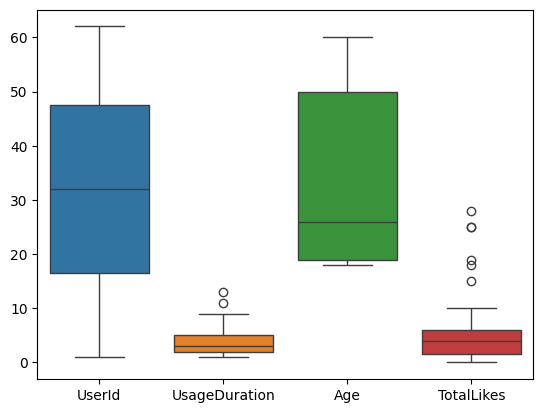

In [16]:
#checking for outliers
sns.boxplot(df)

Outliers are present

In [35]:
#Removing outliers for totalikes
lower_bound=df['TotalLikes'].quantile(0.05)
upper_bound=df['TotalLikes'].quantile(0.95)
df=df[(df['TotalLikes']>=lower_bound) & (df['TotalLikes']<=upper_bound)]

In [36]:
#Removing outliers for usuageduration
lower_bound=df['UsageDuration'].quantile(0.05)
upper_bound=df['UsageDuration'].quantile(0.95)
df=df[(df['UsageDuration']>=lower_bound) & (df['UsageDuration']<=upper_bound)]

<Axes: >

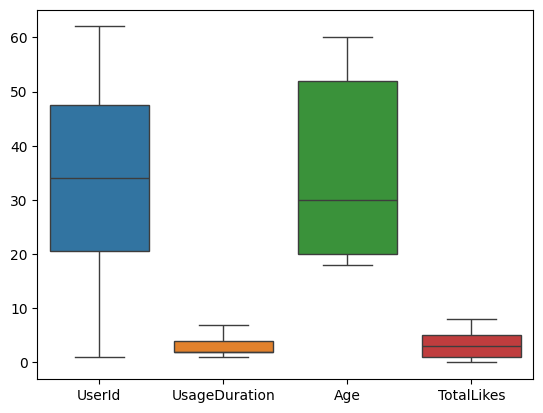

In [46]:
#Rechecking for outliers
sns.boxplot(df)

OBSERVATION: Outliers successfully removed

In [47]:
#rechecking the data shape
df.shape

(51, 6)

# Univariate Analysis and Insights

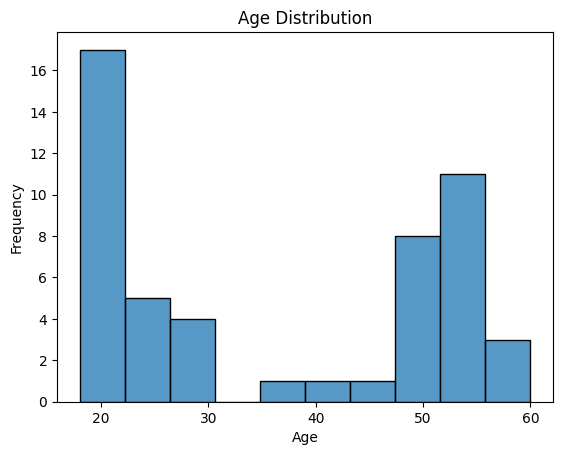

In [48]:
#Create a histogram to show the distribution of ages
sns.histplot(df['Age'],bins=10)
#setting title of the plot
plt.title('Age Distribution')
#label x-axis as 'age'
plt.xlabel('Age')
#label y-axis as 'frequency'
plt.ylabel('Frequency')
#displaying the plot
plt.show()

INSIGHT: Majority of the users falls into the "18:30" age range.

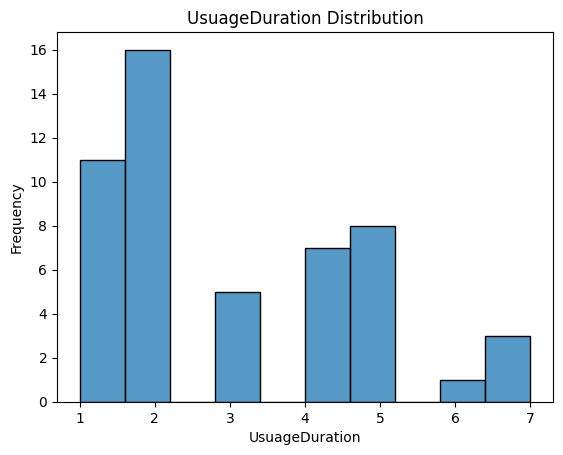

In [49]:
#Create a histogram to show the distribution of ages
sns.histplot(df['UsageDuration'],bins=10)
#setting title of the plot
plt.title('UsuageDuration Distribution')
#label x-axis as 'age'
plt.xlabel('UsuageDuration')
#label y-axis as 'frequency'
plt.ylabel('Frequency')
#displaying the plot
plt.show()

The majority of time duration spent falls into the "1-5hrs" range which is typically a key demographic for social media platforms.

# Bivariate Analysis and Insights

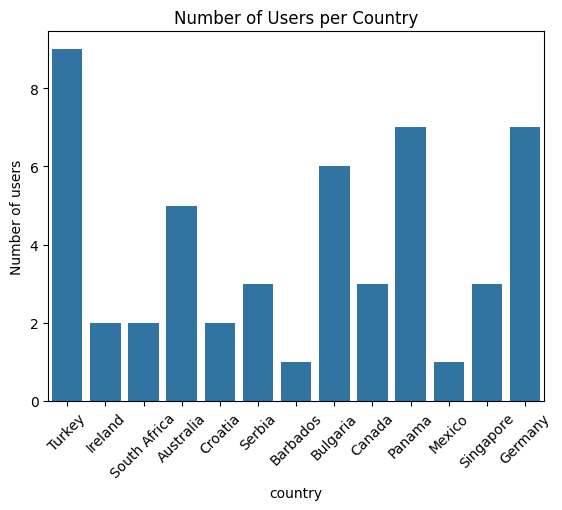

In [42]:
#create a countplot to show the number of users per country
sns.countplot(x='Country',data=df)
#setting title of the plot
plt.title('Number of Users per Country')
#label the x-axis as 'country'
plt.xlabel('country')
#label the y-axis as 'count'
plt.ylabel('Number of users')
#rotate x-axis labels for better readability
plt.xticks(rotation=45)
#displaying the plot
plt.show()

INSIGHT: The highest number of social media users are from turkey,germany and panama

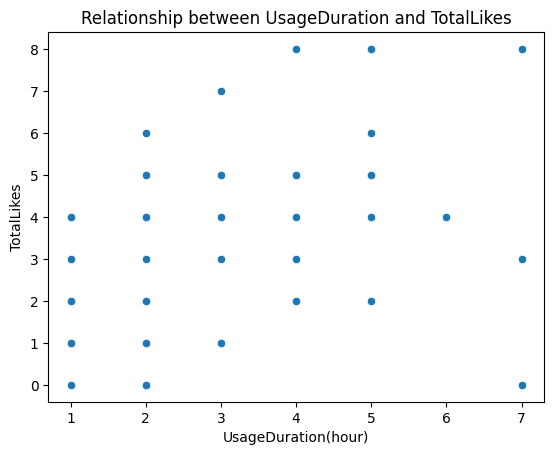

In [43]:
#create a scatter plot to show the realationship between usuage duration and totallikes
sns.scatterplot(x='UsageDuration',y='TotalLikes',data=df)
#setting title of the plot
plt.title('Relationship between UsageDuration and TotalLikes')
#label the x-axis as 'usuage duration(hour)
plt.xlabel('UsageDuration(hour)')
#label the y-axis as 'total likes'
plt.ylabel('TotalLikes')
#displaying the plot
plt.show()

INSIGHT: Longer duration on social media tend to be associated with more likes but this relationship is not linear, suggesting that content quality may also play a role

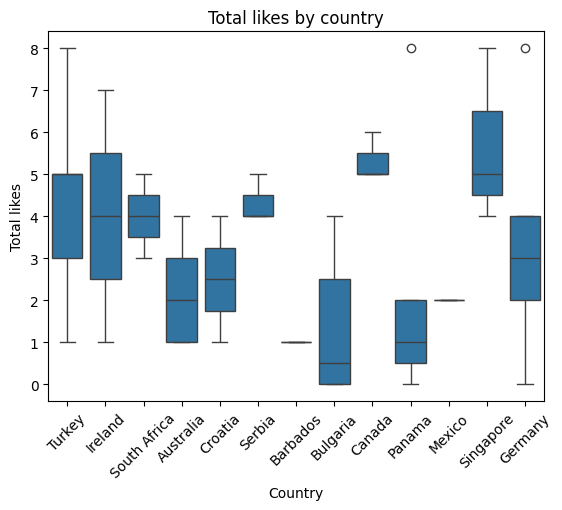

In [45]:
#create boxplot to show the total likes by country
sns.boxplot(x='Country', y='TotalLikes',data=df)
#setting title of the plot
plt.title('Total likes by country')
#label the x-axis as 'country'
plt.xlabel('Country')
#label the y-axis as Total likes'
plt.ylabel('Total likes')
#rotate x-axis labels for better readability
plt.xticks(rotation=45)
#displaying the plot
plt.show()

INSIGHT: Canda has the highest number of likes on social media,followed by turkey and ireland.

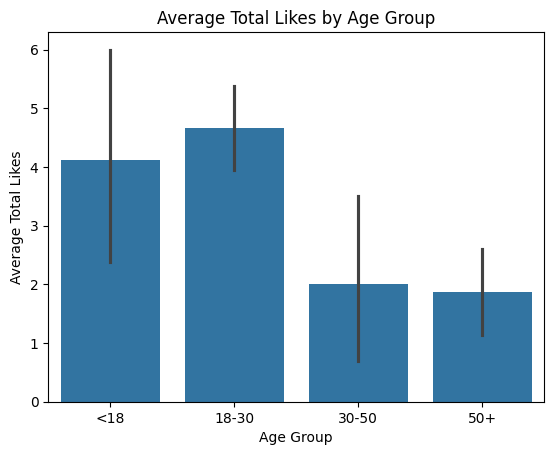

In [50]:
#create age groups using pandals cut fuction
df['AgeGroup']=pd.cut(df['Age'],bins=[0,18,30,50,100],labels=['<18','18-30','30-50','50+'])
#create a barplot to show average total likes by age group
sns.barplot(x='AgeGroup',y='TotalLikes',data=df)
#setting title of the plot
plt.title('Average Total Likes by Age Group')
#label the x-axis as 'age group'
plt.xlabel('Age Group')
#label the y-axis as 'average total likes'
plt.ylabel('Average Total Likes')
#displaying the plot
plt.show()



INSIGHT: The average TotalLikes is between age 18-50

# Multivariate Analysis and Insights

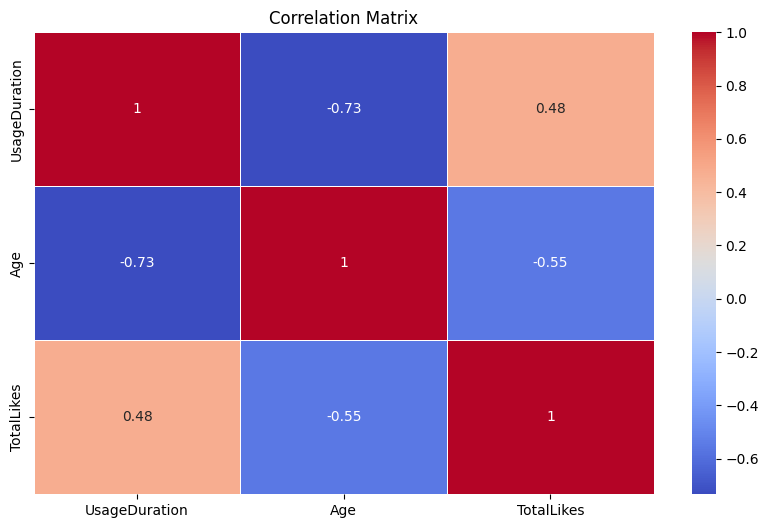

In [51]:
#calculate the correlation matrix to understand relationships between numerical variables

#select all the numerical columns in the data frame, store them in a variable called numeric_cols
numeric_cols=df.select_dtypes(include=['int64','float64'])
#calculate the correlation matrix for the numeric columns
corr_matrix=numeric_cols.corr()
#set the figure size for better readability
plt.figure(figsize=(10,6))
#create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', linewidths=0.5)
#setting title of the plot
plt.title('Correlation Matrix')
#displaying the plot
plt.show()

INSIGHT: The heatmap reveals that there may be a positive correlation between longer usuage duration and the numbers of likes a user gets.bold text

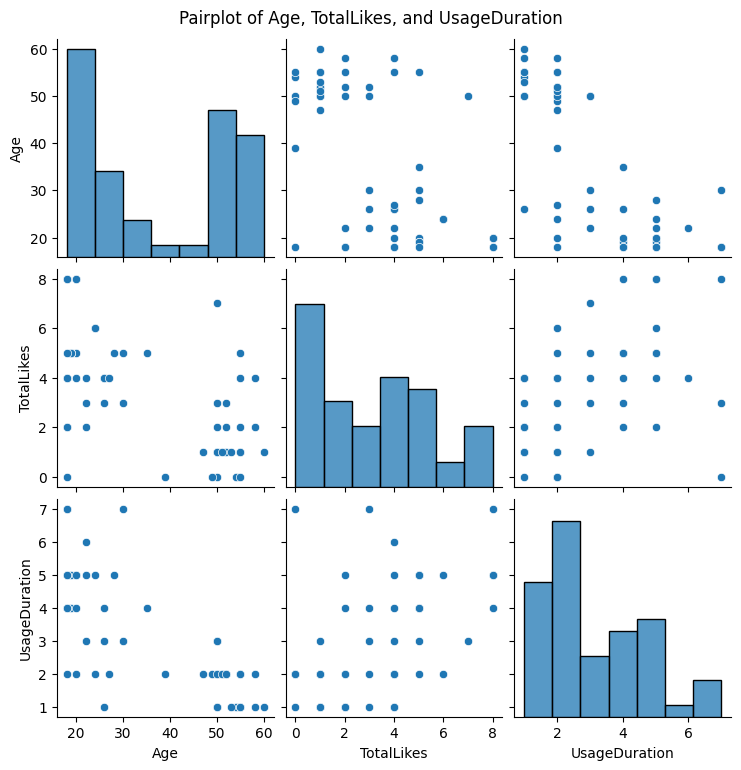

In [52]:
#use seaborn's pairplot to create scatter plots and histograms for pairs of variables
sns.pairplot(df,vars=['Age','TotalLikes','UsageDuration'])
#setting title of the paiplot for better understanding
plt.suptitle('Pairplot of Age, TotalLikes, and UsageDuration',y=1.02)
#displaying the plot
plt.show()

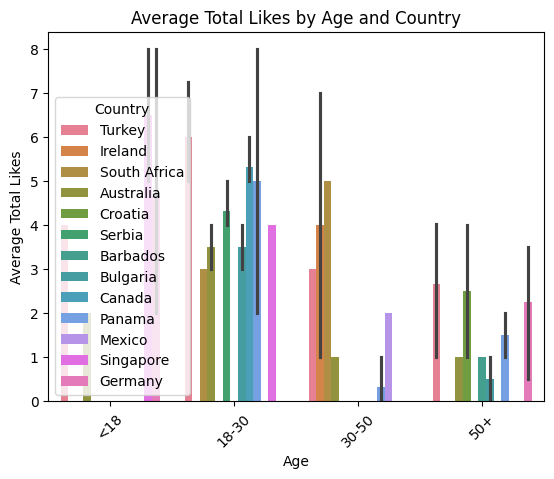

In [54]:
#create a barplot to show the average totallikes by age and country
sns.barplot(x='AgeGroup',y='TotalLikes',hue='Country',data=df)
#setting title of the plot
plt.title('Average Total Likes by Age and Country')
#label the x-axis as 'Age'
plt.xlabel('Age')
#label the y-axis as 'average total likes'
plt.ylabel('Average Total Likes')
#rotate x-axis labels for better readability
plt.xticks(rotation=45)
#displaying the plot
plt.show()


In [30]:
#import files from google.colab
from google.colab import files
#save the cleaned data frame to a csv file
df.to_csv('Cleaned_social-media.csv',index=False)
#download the file
files.download('Cleaned_social-media.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion and Recommodations

**Based on the analysis, we can derive several key insight**

Correlation Insight: The heatmap reveals that there may be a positive correlation between longer usuage duration and the numbers of likes a user gets.bold text

Age group by country analysis: Users in the "18-30" age group tend to have higher duration and receive more likes based on the quality of the content created.

Country-Based Preferences: Canda has the highest number of likes on social media,followed by turkey and ireland.

Outliers Identified: Otliers in TotalLikes suggest that some users have unusually high engagement.

UsuageDuration:The majority of time duration spent falls into the "1-5hrs" range which is typically a key demographic for social media platforms.

Age Distribution: Majority of the users falls into the "18:30" age range.

Engagement Trends: Longer durations on social media tends to be associated with more likes but the relationship is not linear, suggesting that content quality also plays an imortant role.

**RECOMMENDATIONS**



*   Platform Popularity: If there is a column indicating the social media platform, analysis could show which platform are most popular in specific region or age groups
*   Gender analysis: If gender data is available, it could reveal wheather there are differences in social media behaviour between males and females


